<a href="https://colab.research.google.com/github/dabodobo/Sistemas-Inteligentes/blob/main/Image_Classifier_Keras_TF_CNN_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier with Keras and TensorFlow using the GPU

By default the runtime in Colab is CPU-only, but you can change this by enabling GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Now let's import Keras (the rest of the code doesn't change).

In [2]:
from tensorflow import keras
import numpy as np

To plot pretty figures:


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

Here are the corresponding class names:

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## High Accuracy CNN for MNIST

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set.

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

## Compiling the model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

## Training and Evaluating the Model

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features (`X_train`) and the target classes (`y_train`), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs: if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set):

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7985 - loss: 0.5724 - val_accuracy: 0.9016 - val_loss: 0.2586
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8903 - loss: 0.3005 - val_accuracy: 0.9094 - val_loss: 0.2363
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9110 - loss: 0.2400 - val_accuracy: 0.9180 - val_loss: 0.2221
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9270 - loss: 0.1996 - val_accuracy: 0.9218 - val_loss: 0.2129
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9346 - loss: 0.1817 - val_accuracy: 0.9230 - val_loss: 0.2089
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9395 - loss: 0.1596 - val_accuracy: 0.9262 - val_loss: 0.2214
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9462 - loss: 0.1430 - val_accuracy: 0.9250 - val_loss: 0.2072
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9496 - loss: 0.1346 -

And that’s it! The neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, the loss and accuracy (or any other extra metrics you asked for), both on the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached 87.28% after 30 epochs, not too far from the training accuracy, so there does not seem to be much overfitting going on.

The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you create a Pandas DataFrame using this dictionary and call its `plot()` method, you get the learning curves:

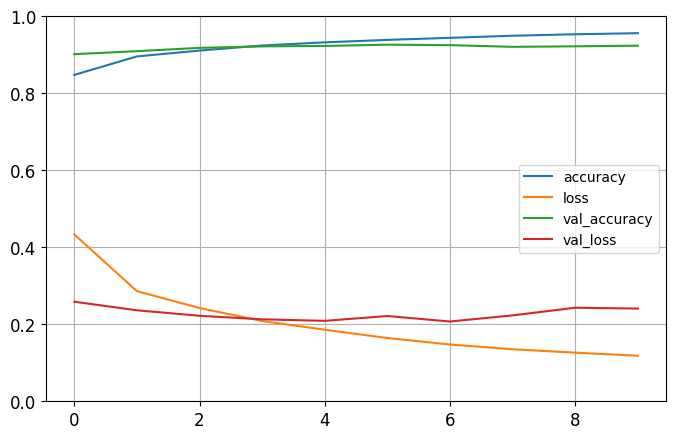

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Good! Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting. In this particular case, the model performed better on the validation set than on the training set at the beginning of training: this sometimes happens by chance (especially when the validation set is fairly small). However, the training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the fit() method again, since Keras just continues training where it left off (you should be able to reach close to 89% validation accuracy).

If you are not satisfied with the performance of your model, you should go back and tune the model’s hyperparameters, for example the number of layers, the number of neurons per layer, the types of activation functions we use for each hidden layer, the number of training epochs, the batch size (it can be set in the `fit()` method using the `batch_size` argument, which defaults to 32). Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as `batch_size` or `sample_weight`, please check the documentation for more details):

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9198 - loss: 0.2705


[0.2707768678665161, 0.9186999797821045]

It is common to get slightly lower performance on the test set
than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.